# TPC2 - Física Estatística

# Atenção: 
* Não deve escrever o seu nome nem nenhum código identificador em nenhum sítio.
* O trabalho é individual. Podem e devem haver discussões com colegas mas o resultado entregue é individual. 
* Deve entregar ESTE Notebook de Jupyter
* Não deve acrescentar ou apagar nenhuma célula
* Todas as explicações devem ser claras e concisas.
* É preferível fazer menos e fazer bem que muito mal.
* O pacote numba pode diminuir o tempo de cálculo. 
* A não verificação de alguma destas regras leva ao anulamento e exclusão da prova.

In [1]:
import numpy as np
import pylab as p
from time import time

# Exercício 1
Nas aulas discutimos a solução do modelo de Ising de campo médio com N spins. Neste trabalho de casa vamos revisitar-lo numericamente. Considere o Hamiltoniano, 
\begin{equation}
H=\frac{1}{2}\sum_{i=1}^{N}\left(1-s_{i}\frac{M-s_{i}}{N-1}\right)=\frac{(N-M)(N+M)}{2(N-1)}
\end{equation}
onde a magnetização é dada por $M=\sum_{i=1}^{N}s_{i}$ e as variáveis de spin $s_{i}$ são $\{\pm1\}$.  Para este modelo a energia é função apenas da magnetização e do número de partículas. A densidade de estados do sistema é obtida usando o número de spins $s_{i}=+1$ ($N_{+}$) e o número de spins $s_{i}=-1$ ($N_{-}$): 
\begin{align}
\Omega(N_{+},N_{-})	&=\frac{N!}{N_{+}!N_{-}!}& 	N_{+}	&=\frac{N+M}{2}	& N_{-}	&=\frac{N-M}{2}
\end{align}
Com esta parametrização,
\begin{equation}
\Omega(M)=\frac{N!}{\left(\frac{N+M}{2}\right)!\left(\frac{N-M}{2}\right)!}
\end{equation}
onde $M\in\{-N,-N+2,\dots,N-2,N\}$.

1. Calcule numericamente o valor médio exacto como função da temperatura do módulo da magnetização para $\beta$ entre 0.1 e 1.5.
\begin{align}
\left\langle \frac{|M|}{N}\right\rangle 	& =\sum_{M}\frac{|M|}{N}\Omega(M)\frac{e^{-\beta E(M)}}{Z(\beta)}  \\
Z(\beta)	& =\sum_{M}\Omega(M)e^{-\beta E(M)}
\end{align}
**Sugestão**: O Cálculo da combinatórica envolve números muito grandes. O idela é usar a fórmula de Stirling,
\begin{equation}
\log(n!)=n\log(n)-n+\frac{1}{2}\log(2\pi n)
\end{equation}
e notar que o valor médio fica inalterado se deslocar a energia $-\beta E(M)\to-\beta E(M)-C$ nas exponenciais. Logo o ideal é calcular,
$$\left\langle \frac{|M|}{N}\right\rangle =\frac{\sum_{M}\frac{|M|}{N}\Omega(M)e^{-\beta E(M)-C}}{\sum_{M}\Omega(M)e^{-\beta E(M)-C}}$$
onde C é o máximo de $\ln\Omega(M)-\beta E(M)$ para cada temperatura.

 (#) Pode  Escrever aqui texto 

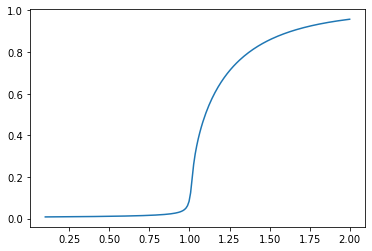

In [16]:
def ln_omega(M,N):
    return N*np.log(N) -(N+M)*0.5*np.log((N+M)/2) -(N-M)*0.5*np.log((N-M)/2) +0.5*np.log(2*N/(np.pi*(N**2-M**2)))
N = 200
M = np.arange(-(N-1),N,1)

def energia(M,N):
    return (N**2-M**2)/2/(N-1)
                          
def valor_medio(M,N,beta):
    C = np.max(ln_omega(M,N) - beta*energia(M,N))
    A=np.sum(np.abs(M)/N*np.exp(ln_omega(M,N)-beta*energia(M,N) - C))
    B =np.sum(np.exp(ln_omega(M,N)-beta*energia(M,N) - C))
    return A/B
N = 10000
M = np.arange(-(N-2),N,2)
#Beta = [0.1,0.5,0.75,0.9,1,1.05,1.1,1.2,1.5,2.]
Beta = np.linspace(.1,2,200)
trips = np.zeros(len(Beta))
i = 0
for beta in Beta:
    valor_medio_valor = valor_medio(M,N,beta)
    trips[i] = valor_medio_valor
    i += 1
p.plot(Beta,trips)
p.show()

2. Para cada temperatura a distribuição de probabilidades da magnetização é dada por, 
$$P_{\beta}(M)=\frac{e^{\ln(\Omega(M))-\beta E(M)}}{Z(\beta)}$$
Gere uma amostra de valores aleatórios de M com a distribução pretendida usando o método directo. Com esta amostra $\{M_{1},M_{2},\dots,M_{K}\}$

(a) Represente o histograma da amostra aleatória gerada e compare com a distribuição teórica para $\beta\in\{0.1,0.5,0.75,0.9,1.0,1.05,1.1,1.2,1.5\}$.

Vemos que os histogramas das amostras obtidas através do método de inversão convergem relativamente rápido para a distribuição teórica.

$\textbf{Obs:}$ É importante notar na diferença de normalização do histograma e da distribuição teórica, que diferem por um fator de 2. Isto vem do facto dos $\textit{bins}$ do histograma terem uma largura de 2 e a função do $\textit{matplotlib}$ usa essa largura para a normalização do histograma. É, no final do $\textit{output}$ desta célula, apresentado um histograma onde os bins têm largura 1 e verifica-se que corresponde à distribuição teórica normalizada corretamente. Por questões práticas, no entanto, dividirei sempre a distribuição teórica por 2 na comparação desta com amostras obtidas, visto tratar-se apenas de uma questão de representação e que em nada muda as conclusões obtidas.

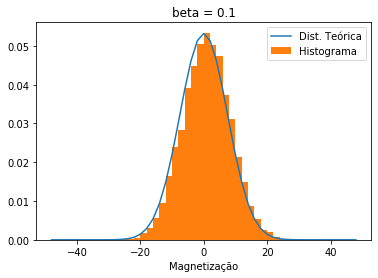

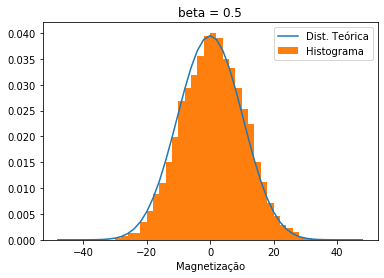

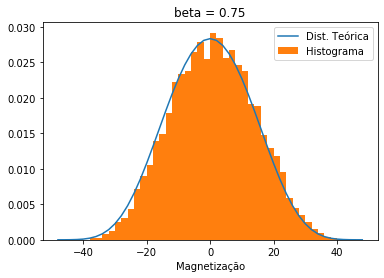

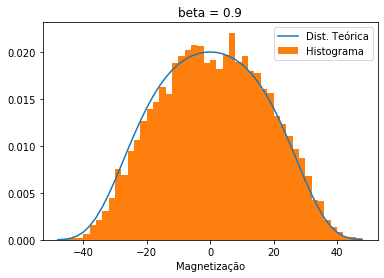

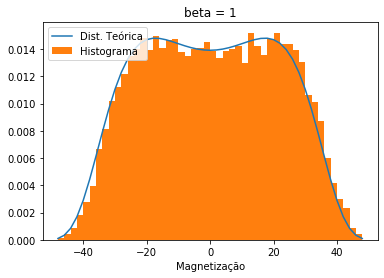

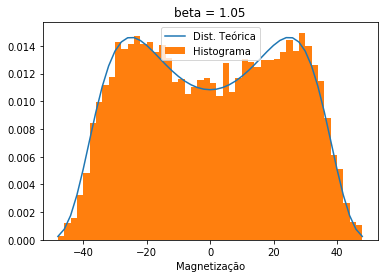

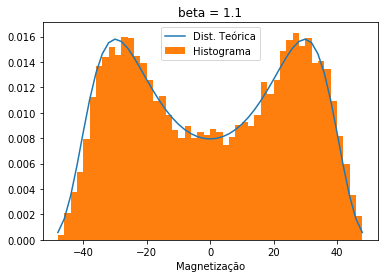

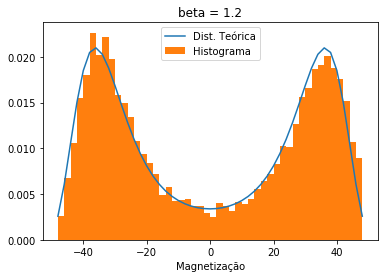

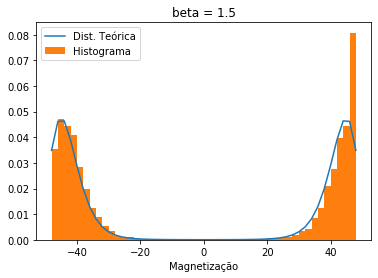

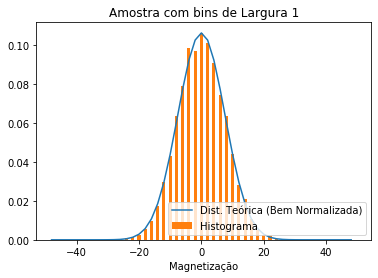

In [42]:
def rho(M,N,beta):
    Z = np.sum(np.exp(ln_omega(M,N) - beta*energia(M,N))) 
    return np.exp(ln_omega(M,N) - beta*energia(M,N))/Z

def inv(M,N,T,beta):
    
    P = rho(M,N,beta)
    C = np.zeros(len(P))
    for i in range(len(P)):
        C[i] = np.sum(P[:i+1])
        
    p = np.random.rand(T)
    x = np.zeros(T)
    for i in range(len(p)):
        v = np.where(C>p[i])[0]
        x[i] = M[int(v[0])]
    return x

N = 50
M = np.arange(-(N-2),N,2)
T = 10000
binada = np.arange(-(N-2),N,2)
Beta = [0.1,0.5,0.75,0.9,1,1.05,1.1,1.2,1.5]
for beta in Beta:
    amostra = inv(M,N,T,beta)
    p.title('beta = ' + str(beta))
    p.plot(M,rho(M,N,beta)/2, label = 'Dist. Teórica')
    p.hist(amostra, bins = binada, density = 'true', label = 'Histograma')
    p.xlabel('Magnetização')
    p.legend()
    p.show()
    
## Amostra com bins de largura 1    
p.title('Amostra com bins de Largura 1')
p.plot(M,rho(M,N,0.1), label = 'Dist. Teórica (Bem Normalizada)')    
binolo = np.arange(-(N-2.5),N,1)
amostra = inv(M,N,T,0.1)
p.hist(amostra, bins = binolo, density = 'true', label = 'Histograma')
p.xlabel('Magnetização')
p.legend(loc = 'lower right')
p.show()

(b) Meça a autocorrelação da magnetização para $\beta=1.05$,
\begin{align}
corr_{M}(\tau)	& =\frac{\left\langle M_{i}M_{i+\tau}\right\rangle -\left\langle M_{i}\right\rangle ^{2}}{\left\langle M_{i}^{2}\right\rangle -\left\langle M_{i}\right\rangle ^{2}} \\
\left\langle M_{i}M_{i+\tau}\right\rangle 	& =\frac{1}{L}\sum_{i=1}^{L}M_{i}M_{i+\tau}
\end{align}


É imediato notar que, à parte do primeiro ponto que é 1, a correlação imediatamente desce e ronda o 0. O facto do primeiro ponto ser 1 é inteiramente justificável pela expressão da correlação $\operatorname{corr}_{M}(\tau)=\frac{\left\langle M_{i} M_{i+\tau}\right\rangle-\left\langle M_{i}\right\rangle^{2}}{\left\langle M_{i}^{2}\right\rangle-\left\langle M_{i}\right\rangle^{2}}$ que, para $\tau = 0$, fica $\operatorname{corr}_{M}(0)=\frac{\left\langle M_{i}^{2}\right\rangle-\left\langle M_{i}\right\rangle^{2}}{\left\langle M_{i}^{2}\right\rangle-\left\langle M_{i}\right\rangle^{2}} = 1$. Este resultado é coerente dado que uma medida está completamente correlacionada consigo própria. Do facto da correlação ser praticamente nula segue então que as medidas da amostra são independentes umas das outras, o que faz sentido no método de inversão.

49


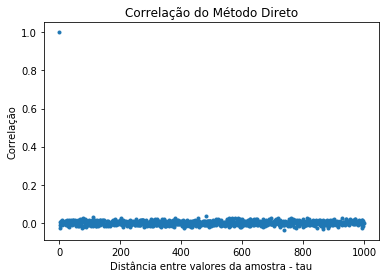

In [22]:
N = 50
M = np.arange(-(N-2),N,2)
print(len(M))
T = 10000
beta = 1.05

x = inv(M,N,T,beta)

Tau = np.arange(0,1000,1)
i = 0
corr = np.zeros(len(Tau))
media = np.sum(x)/T
media_2 = np.sum(x**2)/T
for tau in Tau:
    coisa = np.sum(x[:len(x)-tau]*x[tau:])/(T-tau)
    corr[i] = (coisa - media**2)/(media_2-media**2)
    i += 1
p.plot(Tau,corr,'.')
p.title('Correlação do Método Direto')
p.xlabel('Distância entre valores da amostra - tau')
p.ylabel('Correlação')
p.show()

# Exercício 2
Considere o passeio aleatório no espaço de magnetizações:
\begin{align}
P(M+2|M)	&=\frac{N_{-}}{N}\min\left(1,e^{-\beta\left(E(M+2)-E(M)\right)}\right)\\
P(M-2|M)	&=\frac{N_{+}}{N}\min\left(1,e^{-\beta\left(E(M-2)-E(M)\right)}\right)
\end{align}
1. Verifique que a distribuição assimptótica da magnetização é dada pela distribuição exacta da eq. [eq:exacta] para $\beta=1.05$.



O algoritmo escrito tem como base o algoritmo de inversão para o movimento do $\textit{walker}$ pelo espaço das magnetizações. É também implementada a evolução de N $\textit{walkers}$ ao mesmo tempo. Vemos Que a distribuição assintótica deste algoritmo é dada pela distribuição exata para $\beta$ = 1.05

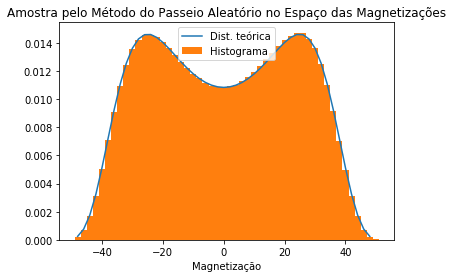

In [23]:
def aleatorio(M,N,beta,T,t):
    arr = np.zeros((T,len(M)))
    for i in range(t):
        P1 = ((N-M)/(2*N)*np.minimum(1,np.exp(-beta*(energia(M+2,N) - energia(M,N)))))
        P2 = ((N+M)/(2*N)*np.minimum(1,np.exp(-beta*(energia(M-2,N) - energia(M,N)))))
        P3 = 1 - P1 - P2
        C = np.array([P1, P1 + P2, P1 + P2 + P3])
        r = np.random.rand(len(M))
        v1 = np.where(r < C[0])
        v2 = np.where(np.logical_and(r>C[0],r<C[1]))
        M[v1] = M[v1]+2
        M[v2] = M[v2] - 2
        
    for i in range(T):
        P1 = ((N-M)/(2*N)*np.minimum(1,np.exp(-beta*(energia(M+2,N) - energia(M,N)))))
        P2 = ((N+M)/(2*N)*np.minimum(1,np.exp(-beta*(energia(M-2,N) - energia(M,N)))))
        P3 = 1 - P1 - P2
        C = np.array([P1, P1 + P2, P1 + P2 + P3])
        r = np.random.rand(len(M))
        v1 = np.where(r < C[0])
        v2 = np.where(np.logical_and(r>C[0],r<C[1]))
        M[v1] = M[v1]+2
        M[v2] = M[v2] - 2
        arr[i] = M
    return np.reshape(arr,T*len(M))


N = 50
M = np.arange(-(N-2),N,2)
beta = 1.05
data = rho(M,N,beta)
p.plot(M,data/2, label = 'Dist. teórica')
T = 10000
t =0

M0 = inv(M,N,4000,beta)
x = aleatorio(M0,N,beta,T,t) 


binada = np.arange(-(N-1),N+3,2)
p.title('Amostra pelo Método do Passeio Aleatório no Espaço das Magnetizações')
p.hist(x, bins = binada, density = 'true', label = 'Histograma')
p.xlabel('Magnetização')
p.legend()
p.show()

2. Meça a autocorrelação (equ. [eq:Autocorrelacao]) da amostra aleatória da magnetização gerada pelo passeio aleatório para $\beta=1.05$ como função do tempo $\tau$. Represente num gráfico.



Aqui notamos na diferença fundamental entre este método e o método de inversão: O facto de que a probabilidade de um $\textit{walker}$ estar numa posição num dado tempo $\tau$ depende da posição no tempo anterior $\tau - 1$ faz com que as medidas da amostra sejam dependentes umas das outras, algo que não acontece no método de inversão. Neste gráfico, vemos que a correlação decresce para 0 à medida que o tempo $\tau$ aumenta.

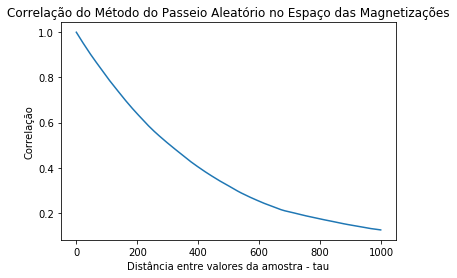

In [28]:

N = 50
M0 = np.array([0])
T = 10000*20
beta = 1.05
x1 = aleatorio(M0,N,beta,T,t) 
Tau = np.arange(0,1000,1)
i = 0
corr = np.zeros(len(Tau))
media = np.sum(x1)/len(x1)
media_2 = np.sum(x1**2)/len(x1)
for tau in Tau:
    coisa = np.sum(x1[:len(x1)-tau]*x1[tau:])/(len(x1)-tau)
    corr[i] = (coisa - media**2)/(media_2-media**2)
    i += 1
p.plot(Tau,corr,)
p.title('Correlação do Método do Passeio Aleatório no Espaço das Magnetizações')
p.xlabel('Distância entre valores da amostra - tau')
p.ylabel('Correlação')
p.show()

3.  Que implicações tem a autocorrelação nos erros das medidas?

Do facto de que as medidas estão correlacionadas segue intuitivamente que o erro das medidas será maior, pois não se tratam de medidas independentes, sendo que o resultado é influenciado por onde começam as medidas a serem amostradas. Matematicamente, temos que :

$$var(\bar{X}) = \frac{var({X})}{N} (1+C(\xi))$$

Onde $C$ é uma função de $\xi$, que é o integral da correlação até ao tamanho da amostra. No caso das medidas serem independentes, é imediato verificar que $var(\bar{X}) = \frac{var({X})}{N} $ e que logo o erro do estimador do valor médio converge para zero com o tamanho da amostra, o que faz com que as amostras obtidas sejam consistentes e precisas, como no caso do método direto. Se por outro lado as medidas forem dependentes entre si e o termo da correlação for não nulo, o erro do estimador da média pode já não convergir para 0 e as amostras deixam de ser precisas e consistentes. Felizmente, para o método do passeio aleatório usado, vemos que a correlação decresce para 0 e por isso, se esperarmos tempo suficiente, as amostras que tiramos pelo método convergem para o esperado, como evidenciado nas células anteriores.


# Exercício 3
Na pergunta anterior efectuamos uma simulação Monte Carlo num espaço de fase a uma dimensão, da variável M. Será que esta dinâmica corresponde à mesma dinâmica do sistema de N spins com o Hamiltoniano 
$$H=\frac{1}{2}\sum_{i=1}^{N}\left(1-s_{i}\frac{M-s_{i}}{N-1}\right)$$ de campo médio e o algorítmo de Metropolis?

1. Para testar implemente o algoritmo de Metropolis para $N$ spins:

• Atribua a cada um dos N spins do sistema uma variável \pm1 com probailidade uniforme.

• Considere um passo de tempo o seguinte algoritmo:

– Escolha um spin com probabilidade uniforme.

– Aceite inverter-lo com a probabilidade $\min\left(1,e^{-\beta\Delta E}\right)$ senão fique no mesmo estado.


Vemos nesta célula que a evolução do sistema através de excitações locais é equivalente ao anterior, dado que a inversão do spin de um eletrão é equivalente a alterar a magnetização do sistema de $\pm\,2$.

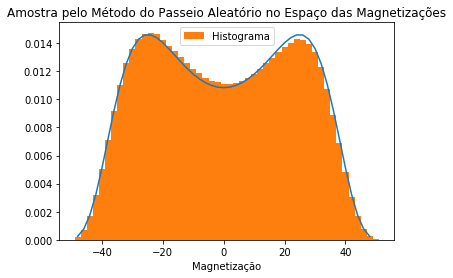

In [31]:
def metropolis_geral(N,num,beta,T,t):
    arr = np.zeros((T,num)) ## mudar 
    s0 =  (np.trunc(np.random.rand(num,N)*2)*2 - 1)       
    
    for i in range(T):
        s = np.copy(s0)
        v = np.trunc(np.random.rand(num)*N)
        v1 = np.arange(0,num,1)
        s[[v1,int(v[0])]] = -s[[v1,int(v[0])]]
        p = np.random.rand(num)
        M0 = np.sum(s0,axis = 1)
        M = np.sum(s, axis = 1)
        ind = np.where( p < np.minimum(1,np.exp(-beta*(energia(M,N) - energia(M0,N)))))
        s0[ind] = np.copy(s[ind])
        arr[i] = np.copy(np.sum(s0, axis = 1))
    return np.reshape(arr,(T*num))

N = 50
t = 0
beta = 1.05

M = np.arange(-(N-2),N,2)
data = rho(M,N,beta)
p.plot(M,data/2)

T = 10000
num = 1000
M0 = inv(M,N,num,beta)
x = metropolis_geral(N,num,beta,T,t)

binada = np.arange(-(N-1),N+3,2)
p.title('Amostra pelo Método do Passeio Aleatório no Espaço das Magnetizações')
p.hist(x, bins = binada, density = 'true', label = 'Histograma')
p.xlabel('Magnetização')
p.legend()
p.show()

2. Verifique se a distribuição gerada neste algoritmo é equivalente à descrita no problema anterior. Gerando a posição inicial a partir do densidade de estados (todos os estados são equiprovaveis) verifique que a distribuição de probabilidade ao final de um tempo fixo ($t=N$,$2N$,$4N$,$16N$) é igual em ambos os algoritmos.


Daqui notamos que os dois métodos convergem ao mesmo tempo para a distribuição teórica, confirmando a sua equivalência.

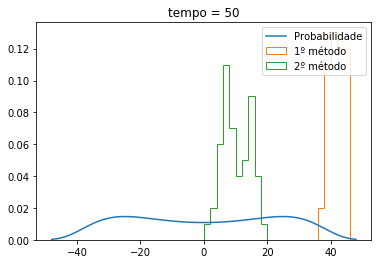

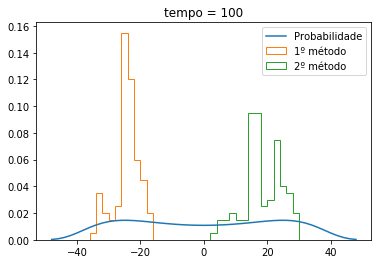

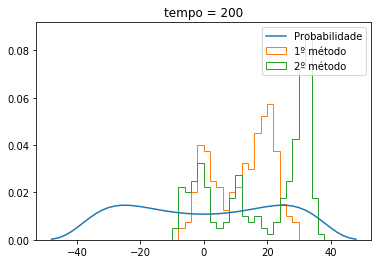

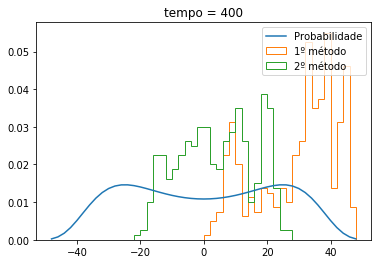

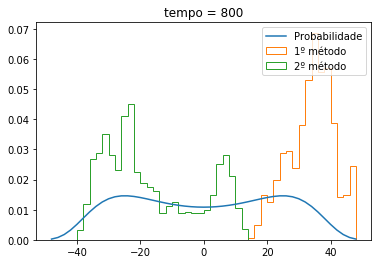

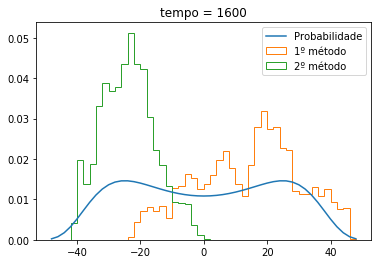

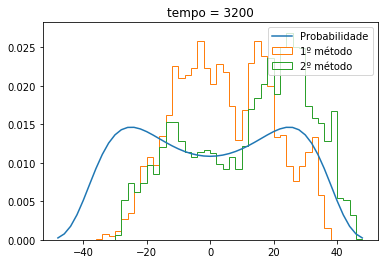

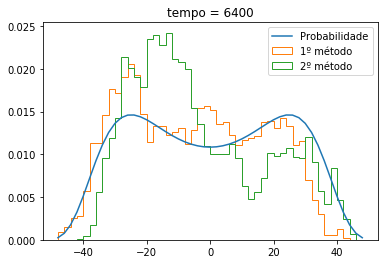

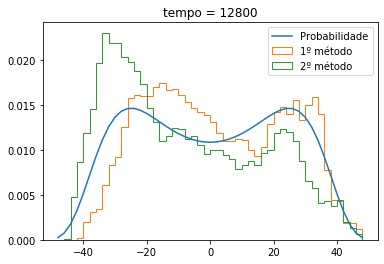

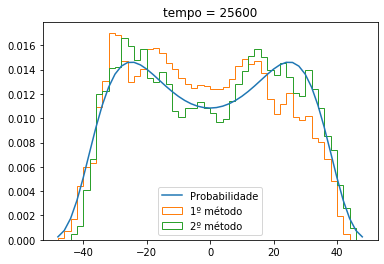

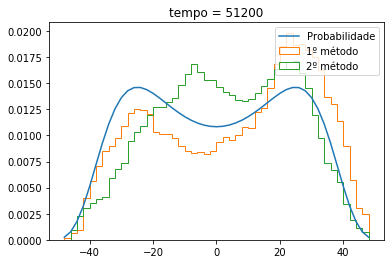

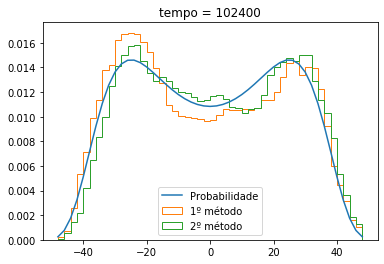

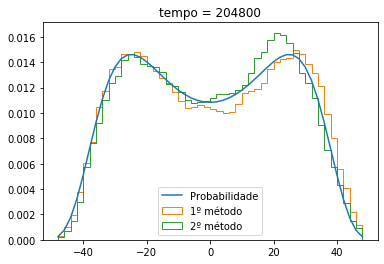

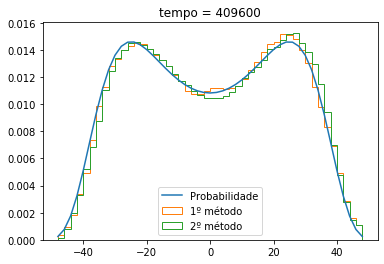

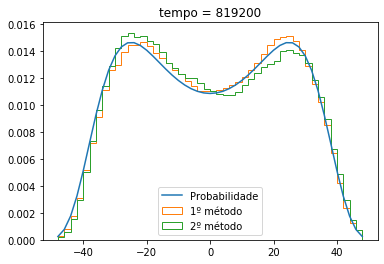

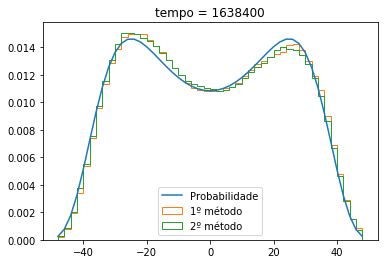

In [51]:
t = 1000
N = 50

M = np.arange(-(N-2),N,2)
beta = 1.05
data = rho(M,N,beta)

num = 1
M0 = inv(M,N,num,0.1)
TAU = 2**np.arange(0,16,1)*N
for T in TAU:
    x_geral=metropolis_geral(N,num,beta,T,t)
    x_aleat = aleatorio(M0,N,beta,T,t)
    p.plot(M,data/2, label = 'Probabilidade')
    p.title('tempo = ' + str(T))
    p.hist(x_aleat, bins = binada, density = 'true', histtype = 'step', label = '1º método')
    p.hist(x_geral, bins = binada, density = 'true', histtype = 'step', label = '2º método')
    p.legend()
    p.show()

3. Se em vez de considerar o modelo de Ising de campo médio considerasse o de duas dimensões como seria o algoritmo?

O Hamiltoniano do modelo de Ising de duas dimensões tem o produto dos spins a primeiros vizinhos em vez do mero somatório dos mesmos. Nisto, as mudanças passam por considerar uma matriz de spins aleatórios entre 1 e -1, sugerir a troca de um desses spins aleatoriamente e calcular o hamiltoniano do sistema antes da troca e depois da troca, aceitando essa troca com uma probabilidade de $min(1,e^{-\beta(\Delta E)})$. Assumindo condições de fronteira periódicas, o cálculo do Hamiltoniano desse sistema pode ser vetorizado computando o produto da matriz original com a matriz deslocada de uma casa para cima e o produto da mesma com a matriz deslocada de uma casa para a esquerda (tendo o cuidado de tratar as fronteiras convenientemente) e somar todos esses produtos, como é feito na célula abaixo. 

Para finalizar, deixo o código da evolução de uma matriz de spins 50 x 50 pelo método de excitações locais e apresento o resultado para uma muito baixa temperatura $\beta$ = 20, que mostra a aglomeração de spins em áreas bem definidas.

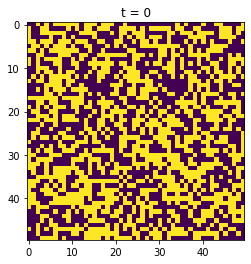

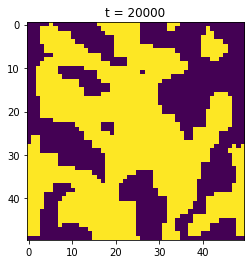

In [53]:
def ising(N,beta,T):
    s0 =  (np.trunc(np.random.rand(N,N)*2)*2 - 1)  
    s1 = np.copy(s0)
    biju = np.arange(0,N,1)
    for i in range(T):
        s = np.copy(s0)
        v1 = np.trunc(np.random.rand()*N)
        v2 = np.trunc(np.random.rand()*N)
        s[int(v1)][int(v2)] = -s[int(v1)][int(v2)]
        
        p = np.random.rand()
        
        
        sM = ( s[(biju + 1)%(N)] + s[:,(biju + 1)%(N)] )*s
        
        sM0 = ( s0[(biju + 1)%(N)] + s0[:,(biju + 1)%(N)] )*s0
        
        H = -np.sum(sM)/N
        H0 = -np.sum(sM0)/N
        
        if p < np.exp(-beta*(H - H0)):
            s0 = np.copy(s)
    return [s0,s1]

matriz = ising(50,200,20000)
p.title('t = 0')
p.imshow(matriz[1])
p.show()
p.title('t = 20000')
p.imshow(matriz[0])
p.show()